## Lectura del Dataset
En formato excel

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import openpyxl

df = pd.read_excel("DatasetTelegramLibro.xlsx")

Información general del dataset

In [173]:
print(df.shape)
df.head()

(197, 32)


,Muestra_ID,USERNAME,VIP_credentials,VIP_group,User_status,PASSWORD,MD5,SHA256,SHA512,SHA1,Password_update,Password_type,Leaked_password,Password_pattern,Guesses_discover,Cracking_time,Password_strength,Password_entropy,CHANNEL_NAME,Chat_type,Channel_privacity,Subscribers,Engagement_rate,Mentions,Posts_day,Reposts,Channel_country,FILE_NAME,Results_file,Country_file_name,TOTAL,RISK
0,1.1,pablopiedrabuena@telebot.com,Vip,Ciber,Active,-P#%1NZoH7NZ,b5262d1151b996f12737e49fa2167fbc,a4799b6642c076748357843a07c0d1bcd3e5eb75ccc0d3...,8d10e6af68a519bf194f880940bb803862320564612323...,84fe8d4c552ef52149c7fb0d80060e51275f1847,Not actual,Personal password,0,Bruteforce,12.00,1.000000e+11,4,78.66,Cloudata FREE Databases ComboLists,Channel,Public,8845,17.58,21,2,10,Other,Ch.txt,1,Other,73.223273,high
1,2.1,davidgarcia@telebot.com,Vip,Ciber,Active,uucp,45b9cfabd8945aa221eb15c629bbf760,730b5353b8edd9b56300b355db37cc39d9da119a68cb1e...,df0f9be2269968c7759fe4e56092f9231f457e5a96a968...,a2dd138f615b6351bd5307c991d6790b5e8c5d9b,Not actual,Personal password,2000,Bruteforce,4.00,1.000100e+03,1,18.80,GODELESS CLOUD,Channel,Public,9393,15.52,25,2,11,Other,France.txt,1,Other,73.827687,high
2,50.1,alvaroafonso@telebot.com,Vip,Ciber,Active,netamin,f350f792fe650c0f858e0cae9cc5a6c7,f860097832f116d4a69b629e712afec9bcba8d3984fec7...,162e3ffef02c08a0b8005b991b2b31db4da76d579f12d4...,0870c592f92eb3d6ba136df5ee4086dd2d0ae21a,Not actual,Personal password,7,Bruteforce,6.62,4.144000e+05,2,32.90,Group,Channel,Public,2340,19.61,21,3,7,Other,Europe.txt,1,Europe,72.340851,high
3,3.1,miguelchacon@telebot.com,Vip,Ciber,Active,pepe,926e27eecdbc7a18858b3798ba99bddd,7c9e7c1494b2684ab7c19d6aff737e460fa9e98d5a234d...,974f3036f39834082e23f4d70f1feba9d4805b3ee2cedb...,265392dc2782778664cc9d56c8e3cd9956661bb0,Not actual,Personal password,13277,Repeats,2.31,2.030000e+01,0,18.80,NoName_Cloud,Channel,Private,508,1.00,1,1,1,Other,900K.txt,1,Other,71.606993,high
4,4.1,eduardobejarano@telebot.com,Vip,Ciber,Active,WrMD4fw7,33763d048d98dc38fe9c100067fae7ca,13da9707d7e30adcfa062bf32d8a51219408d86caf5665...,464304b29b44eca6c123853a57b4759268aa2383bb08af...,99cf2501581ed28d097847282e50fab8b5df53b3,Not actual,Personal password,0,Bruteforce,8.00,1.000000e+07,2,47.63,[ REBREND ],Channel,Public,7852,18.89,68,13,14,Other,44K.txt,1,Other,75.450268,high


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Muestra_ID         197 non-null    float64
 1   USERNAME           197 non-null    object 
 2   VIP_credentials    197 non-null    object 
 3   VIP_group          197 non-null    object 
 4   User_status        197 non-null    object 
 5   PASSWORD           197 non-null    object 
 6   MD5                197 non-null    object 
 7   SHA256             197 non-null    object 
 8   SHA512             197 non-null    object 
 9   SHA1               197 non-null    object 
 10  Password_update    197 non-null    object 
 11  Password_type      197 non-null    object 
 12  Leaked_password    197 non-null    int64  
 13  Password_pattern   197 non-null    object 
 14  Guesses_discover   197 non-null    float64
 15  Cracking_time      197 non-null    float64
 16  Password_strength  197 non

## LIMPIEZA DE DATOS
* Datos faltantes
* Columnas irrelevantes
* Filas repetidas
* Valores extremos (atípicos)
* Errores tipográficos

#### GUARDAR LAS MODIFICACIONES DEL DATAFRAME EN EL LIBRO DE EXCEL:
Cuando se hagan cambios, para modificar el libro de excel se hará así:
```python
 df.to_excel(ruta, index=False)
 print("El DataFrame modificado ha sido guardado en el archivo Excel.")
```


### DATOS FALTANTES
Miramos en la tabla de info para ver si hay el mismo número de registros en todas las columnas.
Podemos eliminar datos falantes o interpolar con datos vecinos (hacemos lo primero)
```python
# Para mirar qué fila tiene el vacío
df[df['Channel_country '].isnull()]

# Para eliminar los vacíos
df.dropna(inplace=True)
df.info()
```

### COLUMNAS IRRELEVANTES
Comprobar que no haya columnas categóricas con un solo nivel o columnas numéricas con un solo valor (esto no aportaría ninguna información relevante al dataframe)


In [176]:
# Almacenar en una lista las columnas de cada tipo

# df.columns
# df['Results in file'].dtype #dtype('int64')
# df['PASSWORD'].dtype #dtype('O')

columnas_object = [col for col in df.columns if df[col].dtype == 'object']
columnas_int = [col for col in df.columns if df[col].dtype == 'int64']
columnas_float = [col for col in df.columns if df[col].dtype == 'float64']
print(f'Tipo object: {len(columnas_object)}, {columnas_object}\n' 
      f'Tipo int: {len(columnas_int)}, {columnas_int}\n' 
      f'Tipo float: {len(columnas_float)}, {columnas_float}')

Tipo object: 19, ['USERNAME', 'VIP_credentials', 'VIP_group', 'User_status', 'PASSWORD', 'MD5', 'SHA256', 'SHA512', 'SHA1', 'Password_update', 'Password_type', 'Password_pattern', 'CHANNEL_NAME', 'Chat_type', 'Channel_privacity', 'Channel_country', 'FILE_NAME', 'Country_file_name', 'RISK']
Tipo int: 7, ['Leaked_password', 'Password_strength', 'Subscribers', 'Mentions', 'Posts_day', 'Reposts', 'Results_file']
Tipo float: 6, ['Muestra_ID', 'Guesses_discover', 'Cracking_time', 'Password_entropy', 'Engagement_rate', 'TOTAL']


In [177]:
for col in columnas_object:
    print(f'Columna {col}: {df[col].nunique()} subniveles')

Columna USERNAME: 42 subniveles
Columna VIP_credentials: 2 subniveles
Columna VIP_group: 4 subniveles
Columna User_status: 2 subniveles
Columna PASSWORD: 191 subniveles
Columna MD5: 191 subniveles
Columna SHA256: 191 subniveles
Columna SHA512: 191 subniveles
Columna SHA1: 191 subniveles
Columna Password_update: 2 subniveles
Columna Password_type: 3 subniveles
Columna Password_pattern: 4 subniveles
Columna CHANNEL_NAME: 17 subniveles
Columna Chat_type: 2 subniveles
Columna Channel_privacity: 2 subniveles
Columna Channel_country: 2 subniveles
Columna FILE_NAME: 18 subniveles
Columna Country_file_name: 3 subniveles
Columna RISK: 5 subniveles


In [178]:
for col in columnas_int:
    print(f'Columna {col}: {df[col].nunique()} subniveles')

Columna Leaked_password: 107 subniveles
Columna Password_strength: 5 subniveles
Columna Subscribers: 100 subniveles
Columna Mentions: 22 subniveles
Columna Posts_day: 22 subniveles
Columna Reposts: 15 subniveles
Columna Results_file: 9 subniveles


In [179]:
for col in columnas_float:
    print(f'Columna {col}: {df[col].nunique()} subniveles')

Columna Muestra_ID: 197 subniveles
Columna Guesses_discover: 96 subniveles
Columna Cracking_time: 116 subniveles
Columna Password_entropy: 54 subniveles
Columna Engagement_rate: 72 subniveles
Columna TOTAL: 196 subniveles


In [180]:
# Otra menaera de verificar las columnas numéricas es calculando la desviación estándar = std (si esta es =0 habrá un solo valor en esa columna)
df.describe()

,Muestra_ID,Leaked_password,Guesses_discover,Cracking_time,Password_strength,Password_entropy,Subscribers,Engagement_rate,Mentions,Posts_day,Reposts,Results_file,TOTAL
count,197.000000,1.970000e+02,197.000000,1.970000e+02,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,36.488325,3.091060e+05,6.730761,5.219890e+11,1.883249,46.557970,4435.710660,14.716091,63.284264,12.005076,4.654822,4.446701,61.349378
std,13.788253,3.047353e+06,3.635521,7.123754e+12,1.407550,19.888961,2656.687698,8.544014,97.889309,20.510450,4.595099,2.176744,21.457053
min,1.100000,0.000000e+00,0.300000,2.000000e-01,0.000000,3.000000,200.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.907036
25%,27.200000,0.000000e+00,3.490000,1.939000e+02,1.000000,29.900000,2380.000000,8.090000,3.000000,2.000000,1.000000,3.000000,52.125172
50%,39.300000,3.300000e+01,6.290000,1.440000e+05,2.000000,45.600000,3635.000000,16.300000,21.000000,4.000000,3.000000,4.000000,71.751288
75%,47.700000,1.296400e+04,10.000000,1.000000e+09,3.000000,61.000000,6000.000000,20.830000,71.000000,12.000000,8.000000,6.000000,75.842165
max,61.100000,4.254281e+07,15.000000,1.000000e+14,4.000000,95.270000,9509.000000,35.440000,370.000000,86.000000,15.000000,9.000000,88.524819


En este caso no había ninguna columna irrelevante





## FILAS REPETIDAS
En primer lugar, se visualizan las filas repetidas.

En segundo lugar, se eliminan con drip_duplicate(inplace=True) las filas repetidas.

Para coprobar se imprime antes y después de la eliminación el tamaño del dataframe

In [181]:
df[df.duplicated()]

,Muestra_ID,USERNAME,VIP_credentials,VIP_group,User_status,PASSWORD,MD5,SHA256,SHA512,SHA1,Password_update,Password_type,Leaked_password,Password_pattern,Guesses_discover,Cracking_time,Password_strength,Password_entropy,CHANNEL_NAME,Chat_type,Channel_privacity,Subscribers,Engagement_rate,Mentions,Posts_day,Reposts,Channel_country,FILE_NAME,Results_file,Country_file_name,TOTAL,RISK


In [88]:
print(f'Tamaño dataframe antes de eliminar: {df.shape}')
df.drop_duplicates(inplace=True)
print(f'Tamaño dataframe después de eliminar: {df.shape}')

df

Tamaño dataframe antes de eliminar: (198, 30)
Tamaño dataframe después de eliminar: (197, 30)


,Muestra ID,USERNAME,VIP credentials,VIP group,User Status,PASSWORD,MD5,SHA256,SHA512,SHA1,Password update,Password type,Leaked password (nº),Password Pattern,Guesses to discover,Cracking time,Password strength score,Password entropy,CHANNEL NAME,Chat type,Channel privacity,Subscribers in channel,Engagement Rate,Mentions,Posts per Day,Reposts,Channel Country,FILE NAME,Results in file,Country in file name
0,1.1,pablopiedrabuena@telebot.com,Vip,Ciber,Active,-P#%1NZoH7NZ,b5262d1151b996f12737e49fa2167fbc,a4799b6642c076748357843a07c0d1bcd3e5eb75ccc0d3...,8d10e6af68a519bf194f880940bb803862320564612323...,84fe8d4c552ef52149c7fb0d80060e51275f1847,Not actual,Personal password,0,Bruteforce,12.00,1.000000e+11,4,78.66,Cloudata FREE Databases ComboLists,Channel,Public,8845,17.58,21,2,10,Other,Ch.txt,1,Other
1,2.1,davidgarcia@telebot.com,Vip,Ciber,Active,uucp,45b9cfabd8945aa221eb15c629bbf760,730b5353b8edd9b56300b355db37cc39d9da119a68cb1e...,df0f9be2269968c7759fe4e56092f9231f457e5a96a968...,a2dd138f615b6351bd5307c991d6790b5e8c5d9b,Not actual,Personal password,2000,Bruteforce,4.00,1.000100e+03,1,18.80,GODELESS CLOUD,Channel,Public,9393,15.52,25,2,11,Other,France.txt,1,Other
2,50.1,alvaroafonso@telebot.com,Vip,Ciber,Active,netamin,f350f792fe650c0f858e0cae9cc5a6c7,f860097832f116d4a69b629e712afec9bcba8d3984fec7...,162e3ffef02c08a0b8005b991b2b31db4da76d579f12d4...,0870c592f92eb3d6ba136df5ee4086dd2d0ae21a,Not actual,Personal password,7,Bruteforce,6.62,4.144000e+05,2,32.90,Cracked Group,Channel,Public,2340,19.61,21,3,7,Other,Europe.txt,1,Europe
3,3.1,miguelchacon@telebot.com,Vip,Ciber,Active,pepe,926e27eecdbc7a18858b3798ba99bddd,7c9e7c1494b2684ab7c19d6aff737e460fa9e98d5a234d...,974f3036f39834082e23f4d70f1feba9d4805b3ee2cedb...,265392dc2782778664cc9d56c8e3cd9956661bb0,Not actual,Personal password,13277,Repeats,2.31,2.030000e+01,0,18.80,NoName_Cloud,Channel,Private,508,1.00,1,1,1,Other,900K.txt,1,Other
4,4.1,eduardobejarano@telebot.com,Vip,Ciber,Active,WrMD4fw7,33763d048d98dc38fe9c100067fae7ca,13da9707d7e30adcfa062bf32d8a51219408d86caf5665...,464304b29b44eca6c123853a57b4759268aa2383bb08af...,99cf2501581ed28d097847282e50fab8b5df53b3,Not actual,Personal password,0,Bruteforce,8.00,1.000000e+07,2,47.63,[ REBREND ],Channel,Public,7852,18.89,68,13,14,Other,44K.txt,1,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,52.3,rafaelortega@telebot.com,Vip,Ciber,Active,d9nW6oGu,be3f6126764ad36f785f329fea894628,b9896ebab1da8541dbf5cf7c344289b35166fdc0b7a10c...,4f51cea0cb40010c48b2a36a78d56a26eb1639c23c55a3...,70dc35eacc4150e8f3944d6a8aef0983c4ebe055,Not actual,Personal password,0,Bruteforce,8.00,1.000000e+07,2,47.63,DB-MARKEET,Channel,Public,5096,17.12,161,4,4,Other,UPL.txt,8,Other
193,52.4,pablopiedrabuena@telebot.com,Vip,Ciber,Active,Telebot2023+,4e1afb717d0492f6058984ac34023c16,d6affb3ed382f48e33f496003197dd349d074a11256376...,c657a107790bda8e49f1dd730c8aad929c1a1a6986b4fa...,76852cb8cd03c0df456c821eeb031e0ce01d0576,Actual,Default password,0,Dictionary,11.80,6.720000e+10,4,78.66,Databases World🔰,Channel,Public,2244,32.57,3,2,3,Other,Portugal.txt,8,Other
194,52.5,albertoestirado@telebot.com,Vip,Ciber,Active,bee,9dfd70fdf15a3cb1ea00d7799ac6651b,62cb81b5904a262ffaeed02abef36bfc540b09f964b8b0...,0159d8667999bcc9e752655a43359c1eaf8958c519faa5...,917ee46db0cda4c4739bb176b3cf68880f7dba95,Not actual,Personal password,4186,Bruteforce,3.00,1.000000e+02,0,14.10,[ REBREND ],Channel,Public,8129,16.30,74,12,14,Other,900K.txt,8,Other
195,52.6,mariadiaz@telebot.com,Vip,Ciber,Active,12345,e2f91f170f15390b5084510e546c09f8,bc47ae33866b036dd2d3c9fa53ce34786087d047c830c8...,be4c43b9eb51e52a4c54fb153f9f13f2f07969adf56ce1...,1e628815f4ecb1c23e66bdfb8252db752107989e,Not actual,Personal password,3508324,Dictionary,0.84,7.000000e-01,0,16.51,OPENBULLET,Channel,Public,4974,23.13,260,9,3,Other,UPL.txt,8,Other


## VALORES EXTREMOS (OUTLIERS)
Siempre se refieren a datos numéricos

No siempre se deben eliminar los valores extremos, pero debemos estudiarlos

Crearemos gráficas de tipo boxplot. Para ello, en primer lugar agrupamos en una lista (cols_num) todas las columnas numéricas int + float, con la que trabajaremos

In [182]:
cols_num = columnas_int + columnas_float
cols_num

['Leaked_password',
 'Password_strength',
 'Subscribers',
 'Mentions',
 'Posts_day',
 'Reposts',
 'Results_file',
 'Muestra_ID',
 'Guesses_discover',
 'Cracking_time',
 'Password_entropy',
 'Engagement_rate',
 'TOTAL']

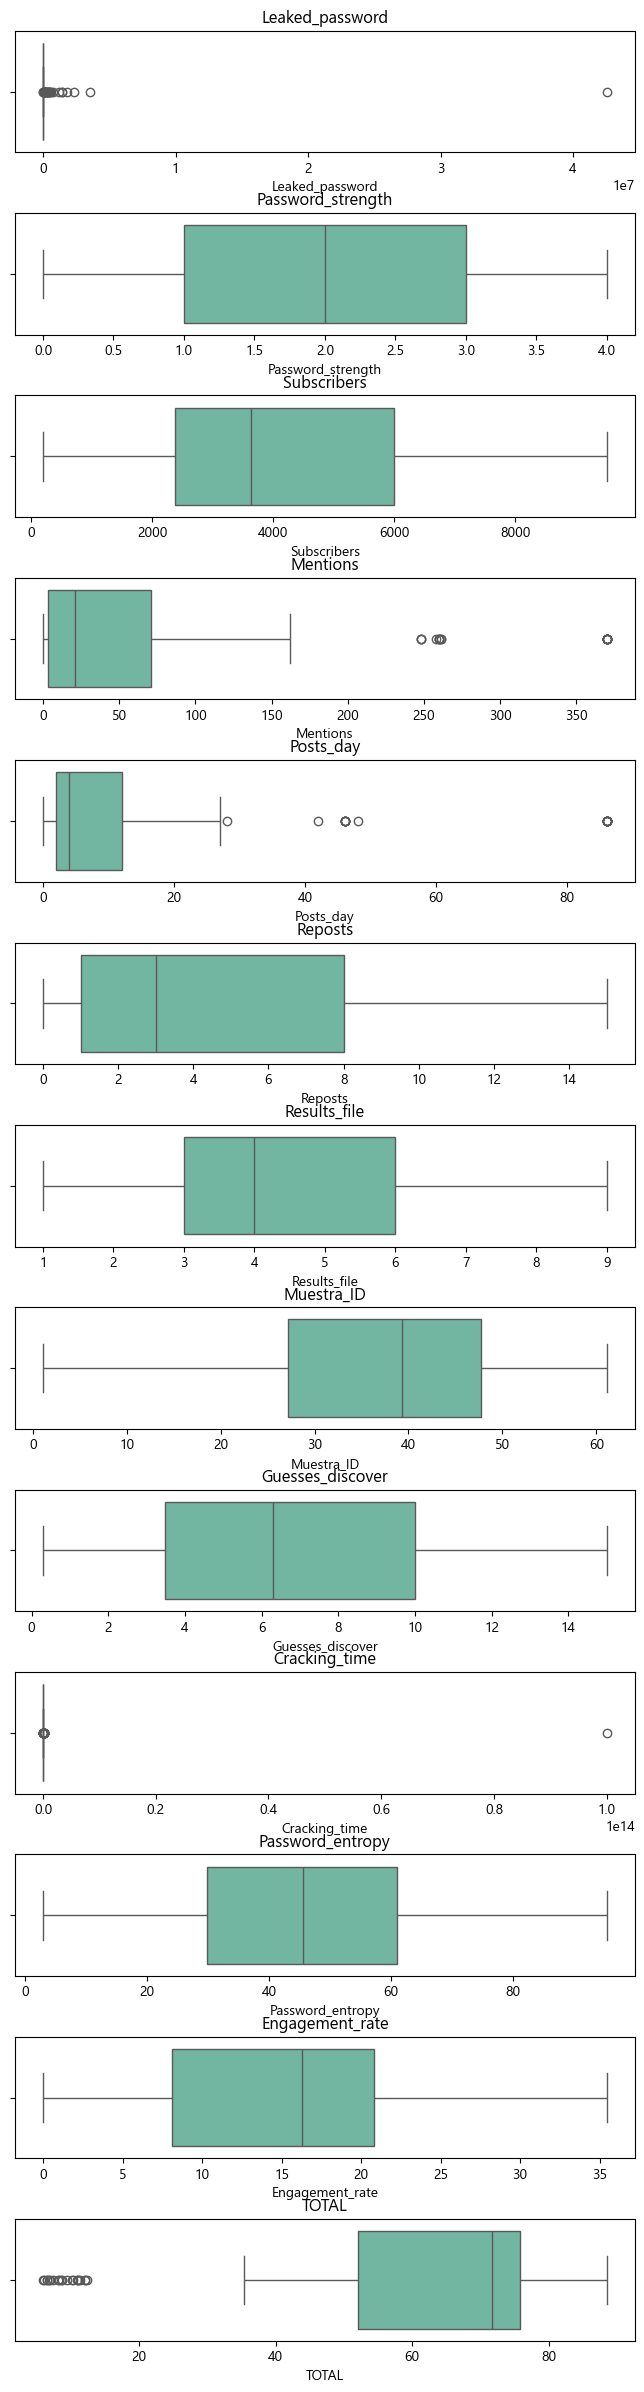

In [183]:

fig, ax = plt.subplots(nrows=13, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

¿Dónde observamos los outliers que no tienen coherencia? 
* Engagement rate
* Cracking time
* Leaked password
* Posts per day
* Mentions

In [199]:
# Mostrar filas con los outliers para la columna Cracking Time:
outliers1 = df[df['Cracking time'] > 0.9e+14]
outliers1

,Muestra ID,USERNAME,VIP credentials,VIP group,User Status,PASSWORD,MD5,SHA256,SHA512,SHA1,Password update,Password type,Leaked password (nº),Password Pattern,Guesses to discover,Cracking time,Password strength score,Password entropy,CHANNEL NAME,Chat type,Channel privacity,Subscribers in channel,Engagement Rate,Mentions,Posts per Day,Reposts,Channel Country,FILE NAME,Results in file,Country in file name
119,39.2,yolandamontero@telebot.com,not vip,Otros,active,wkQAdcrXYXNu2024,e097d0200bd41d6b5e48e13a76b27601,20559a524c1b4e98f242d71fd871cf160dbc9bdf2ee024...,a8fc0efd41a4edff1df8a9f11d07baeff505a136c334cf...,bfa40ba4cd49df2aafb27820d37253c1012b8c11,actual,personal password,0,sequence,15.0,1.000000e+14,4,95.27,HQ COMBO | FRESH BASES | VALID COMBO LIST,Channel,Public,3126,8.09,5,46,1,other,France.txt,5,Other


In [200]:
outliers1['Cracking time']

119    1.000000e+14
Name: Cracking time, dtype: float64

In [201]:
# MOSTRANDO TODAS LAS COLUMNAS DEL DATAFRAME
pd.set_option('display.max_columns', None)
outliers1

,Muestra ID,USERNAME,VIP credentials,VIP group,User Status,PASSWORD,MD5,SHA256,SHA512,SHA1,Password update,Password type,Leaked password (nº),Password Pattern,Guesses to discover,Cracking time,Password strength score,Password entropy,CHANNEL NAME,Chat type,Channel privacity,Subscribers in channel,Engagement Rate,Mentions,Posts per Day,Reposts,Channel Country,FILE NAME,Results in file,Country in file name
119,39.2,yolandamontero@telebot.com,not vip,Otros,active,wkQAdcrXYXNu2024,e097d0200bd41d6b5e48e13a76b27601,20559a524c1b4e98f242d71fd871cf160dbc9bdf2ee024...,a8fc0efd41a4edff1df8a9f11d07baeff505a136c334cf...,bfa40ba4cd49df2aafb27820d37253c1012b8c11,actual,personal password,0,sequence,15.0,1.000000e+14,4,95.27,HQ COMBO | FRESH BASES | VALID COMBO LIST,Channel,Public,3126,8.09,5,46,1,other,France.txt,5,Other


In [213]:
# HACEMOS LO MISMO CON EL RESTO DE COLUMNAS
pd.set_option('display.max_columns', None)
outliers2 = df[df['Engagement Rate'] > 200]

outliers2
# ENGAGEMENT RATE


,Muestra ID,USERNAME,VIP credentials,VIP group,User Status,PASSWORD,MD5,SHA256,SHA512,SHA1,Password update,Password type,Leaked password (nº),Password Pattern,Guesses to discover,Cracking time,Password strength score,Password entropy,CHANNEL NAME,Chat type,Channel privacity,Subscribers in channel,Engagement Rate,Mentions,Posts per Day,Reposts,Channel Country,FILE NAME,Results in file,Country in file name
117,38.5,gonzalotejedor@telebot.com,vip,Ciber,active,rootme,96ca9d2f94b871e6933b51800e24e917,746ff992cd97391b15891f93dd1ce02908c33947c60f1a...,4b96c64ca2ddac7d50fd33bc75028c9462dfbea446f51e...,c1f46c805200d800a0c0185b33334b263d34c7ed,not actual,personal password,328,dictionary,5.21,16370.0,1,28.2,𝐹𝑅𝐸𝐸 𝑹𝑫𝑷/𝑽𝑷𝑺 & 𝐵𝐼𝑁𝑁𝐸𝑅𝑆 𝐶𝐶,Channel,Public,4262,283.0,149,27,1,other,234K.txt,5,Other


Se hace el cambio tras comprobar que es una errata al muestrear

In [219]:
df.loc[df['Engagement Rate'] == 283.0, 'Engagement Rate'] = 28.30
df.iloc[117]['Engagement Rate']

28.3

In [218]:
outliers3 = df[df['Leaked password (nº)'] > 3e+7]
outliers3
# LEAKED PASSWORD

,Muestra ID,USERNAME,VIP credentials,VIP group,User Status,PASSWORD,MD5,SHA256,SHA512,SHA1,Password update,Password type,Leaked password (nº),Password Pattern,Guesses to discover,Cracking time,Password strength score,Password entropy,CHANNEL NAME,Chat type,Channel privacity,Subscribers in channel,Engagement Rate,Mentions,Posts per Day,Reposts,Channel Country,FILE NAME,Results in file,Country in file name
159,46.4,yolandasantiago@telebot.com,not vip,Otros,active,123456,0c89d5f76cf33cc8217ca3ff0a6fc2d0,2b3e7c9ad96b4aa2130345dfbae905195cd31d4f395977...,5dc61ebdee351e80cd7a54eebadb4d1136059fedd3d286...,15d86129edc1235b6ba9961c082879ac2b4b8360,not actual,personal password,42542807,dictionary,0.3,0.2,0,19.9,Databases World🔰,Channel,Public,2244,32.57,3,2,3,other,900K.txt,6,Other


Se comprueba que es un outlier válido (la contraseña 123456 ha sido leakeada muchas veces)

In [207]:
outliers4 = df[df['Posts per Day'] > 40]
outliers4
# POSTS PER DAY

,Muestra ID,USERNAME,VIP credentials,VIP group,User Status,PASSWORD,MD5,SHA256,SHA512,SHA1,Password update,Password type,Leaked password (nº),Password Pattern,Guesses to discover,Cracking time,Password strength score,Password entropy,CHANNEL NAME,Chat type,Channel privacity,Subscribers in channel,Engagement Rate,Mentions,Posts per Day,Reposts,Channel Country,FILE NAME,Results in file,Country in file name
9,50.6,danielmolina@telebot.com,vip,ciber,active,987654321,d438f8205208b128ec70160af617da21,9b1a38da919ae9c59e4fd9d437037173162ecdf675989d...,5314ad68f5da7d1b2f48dc7b84a48677ec80de12af85bd...,0a8769928cc722f8bdeed09da2df9308ad5969a0,not actual,personal password,1215494,dictionary,1.04,1.100000e+00,0,29.90,URL:USER:PASS CLOUD,Channel,Public,3555,24.67,25,86,1,other,Europe.txt,6,Other
15,9.1,jorgeesquinas@telebot.com,vip,ciber,active,mario,de2f15d014d40b93578d255e6221fd60,59195c6c541c8307f1da2d1e768d6f2280c984df217ad5...,76bb849338db38e0ede3b8ae726373c42992152747c39e...,addb47291ee169f330801ce73520b96f2eaf20ea,not actual,personal password,52543,dictionary,9.00,1.390000e+01,0,23.50,URL:USER:PASS CLOUD,Channel,Public,3555,24.67,25,86,1,other,India.txt,1,Other
18,18.2,yolandaramos@telebot.com,not vip,otros,active,info,caf9b6b99962bf5c2264824231d7a40c,06271baf49532c879aa3c58b48671884bcc858f0919741...,653ac8a32dfaa09881d77b31c03a9872e6091edd26a597...,59bd0a3ff43b32849b319e645d4798d8a5d1e889,not actual,personal password,33644,dictionary,3.51,3.234000e+02,1,18.80,HQ COMBO | FRESH BASES | VALID COMBO LIST,Channel,Public,2853,9.50,6,42,2,other,France.txt,2,Other
26,13.1,fernandogarcia@telebot.com,vip,Ciber,active,Telebot2021+,db4b513e323490ebc0ffdde4d74779ae,7ba0349edf8820c6a67bfa7db7c3e9d6d5ab66f45307f1...,b58ebe4ba58963785020c16faf576575ad3208f60cd106...,e63a35104a47c5d6ad2f1c15499e3768615fbb00,not actual,default password,0,dictionary,11.83,6.720000e+10,4,78.66,URL:USER:PASS CLOUD,Channel,Public,3555,24.67,25,86,1,other,665K.txt,1,Other
73,25.1,yolandademiguel@telebot.com,not vip,Otros,active,vLb7rsE8IU,142b049cccb3f036e076b8db7dc6dd4c,69801314a8c8e031b1c5d0a918ed7c82f1e6ba8ab96bb4...,81814096567f85756ef8d375ef61a6bc23d59394d8823e...,de133e237c91e0bb22c9056e5f67dd78ef42075d,not actual,personal password,0,bruteforce,10.00,1.000000e+09,3,59.54,URL:USER:PASS CLOUD,Channel,Public,3555,24.67,25,86,1,other,234K.txt,3,Other
84,28.3,yolandadiez@telebot.com,not vip,Otros,active,systemadmin,f19826e36a24ce639a7036c19b33f97d,19be86d8193d3b7c1a64e1c8458acb06ebfc7576b367d7...,e587587a31e1dfd533616daef708e9e4d1a71090226d3f...,05324e17d8d6ff97e52647716355c21a4c16b15e,not actual,personal password,662,dictionary,5.30,2.273600e+04,1,51.70,URL:USER:PASS CLOUD,Channel,Public,3555,24.67,25,86,1,other,Mail_logs.txt,3,Other
88,29.4,christianposadas@telebot.com,vip,Ciber,active,a,0cc175b9c0f1b6a831c399e269772661,ca978112ca1bbdcafac231b39a23dc4da786eff8147c4e...,1f40fc92da241694750979ee6cf582f2d5d7d28e18335d...,86f7e437faa5a7fce15d1ddcb9eaeaea377667b8,not actual,personal password,134003,bruteforce,1.00,1.200000e+00,0,4.70,URL:USER:PASS CLOUD,Channel,Public,3555,24.67,25,86,1,other,44K.txt,4,Other
90,34.3,gemamartinez@telebot.com,vip,Directiva,active,test123,cc03e747a6afbbcbf8be7668acfebee5,ecd71870d1963316a97e3ac3408c9835ad8cf0f3c1bc70...,daef4953b9783365cad6615223720506cc46c5167cd16a...,7288edd0fc3ffcbe93a0cf06e3568e28521687bc,not actual,personal password,186072,dictionary,2.77,5.950000e+01,0,36.19,URL:USER:PASS CLOUD,Channel,Public,3555,24.67,25,86,1,other,EU.txt,4,Europe
98,30.2,alfredoestirado@telebot.com,vip,CEO,active,jupiter,27a5148ea0fbddae22d902bea9a19531,1e9cc37678c0112d7a394909256c2a5998a6e57e2b0d82...,9fcc535147715e1c709dd3617c6bafa48ec4d59ba4620d...,a2f7fcb5afeb7983ffbb6ce3d1a7e91edf321350,not actual,personal password,85978,dictionary,2.72,5.230000e+01,0,52.00,HQ COMBO | FRESH BASES | VALID COMBO LIST,Channel,Public,3126,8.25,5,48,1,other,665K.txt,4,Other
102,31.2,daniellillo@telebot.com,vip,Ciber,active,iloveyou,f25a2fc72690b780b2a14e140ef6a9e0,e4

Se comprueba que es un outlier válido

In [22]:
pd.set_option('display.max_columns', None)

outliers5 = df[df['Mentions'] > 300]
outliers5

# MENTIONS

,Muestra ID,USERNAME,VIP credentials,VIP group,User Status,PASSWORD,MD5,SHA256,SHA512,SHA1,Password update,Password type,Leaked password (nº),Password Pattern,Guesses to discover,Cracking time,Password strength score,Password entropy,CHANNEL NAME,Chat type,Channel privacity,Subscribers in channel,Engagement Rate,Mentions,Posts per Day,Reposts,Channel Country,FILE NAME,Results in file,Country in file name
44,37.4,victorluque@telebot.com,vip,ciber,active,*@N3P]/9CF,e4c89e7e716d64332f0300fb4c632912,53da188d54dd3f89cee6503a452a8c2c15919b8612d4ac...,6502dd4b0573847fff4b78beeec29e37661be23454d48d...,10e588071836d4f01236f76b36818a318ba2a349,not actual,personal password,0,sequence,10.00,1.000000e+11,3,60.87,❚█══Red_Script══█❚ ₛₜₑₐₗₑᵣ Dₑₚₐᵣₜₘₑₙₜ,Channel,Public,2410,7.72,370,1,1,other,EU.txt,4,Europe
46,37.5,mariadiaz@telebot.com,vip,ciber,active,super,1b3231655cebb7a1f783eddf27d254ca,73d1b1b1bc1dabfb97f216d897b7968e44b06457920f00...,36379d8584770820d95741c8efe571cc0ab37e2021c505...,8451ba8a14d79753d34cb33b51ba46b4b025eb81,not actual,personal password,67101,sequence,2.75,5.640000e+01,0,23.50,❚█══Red_Script══█❚ ₛₜₑₐₗₑᵣ Dₑₚₐᵣₜₘₑₙₜ,Channel,Public,2410,7.72,370,1,0,other,Mail_logs.txt,5,Other
89,34.2,martapeña@telebot.com,not vip,Otros,inactive,D07+nO?b9U,6ec15d62b6dec149e9d6541ead264ad7,26b8e8bd2b669c6135527d0602fb0ee7a3f54109e7c204...,f9f758a9ff1b5eb25cd53273ebd906d1bbee3e871b8b0d...,ddc4fbd9b0b353b4bbdcca41e09ed4573c724ebb,not actual,personal password,0,bruteforce,10.00,1.000000e+08,3,65.55,❚█══Red_Script══█❚ ₛₜₑₐₗₑᵣ Dₑₚₐᵣₜₘₑₙₜ,Channel,Public,2430,8.48,370,1,0,other,234K.txt,4,Other
97,37.2,yolandasantiago@telebot.com,not vip,Otros,active,Fv4e7P7Tuk,83b73a344e1b164c7a028788c31ab4d0,7d7fafe45ff26cc9594024ca3935ff16b33354394bbc2a...,914d58543f1097c9dd83498ff1471057f19d39ec0857f0...,18e66614c4cd0cff7252f67874c437c1dee92932,not actual,personal password,0,bruteforce,10.00,1.000000e+09,3,59.54,❚█══Red_Script══█❚ ₛₜₑₐₗₑᵣ Dₑₚₐᵣₜₘₑₙₜ,Channel,Public,2430,8.48,370,1,0,other,665K.txt,5,Other
111,33.3,carlosdiaz@telebot.com,vip,Directiva,active,ftp2024,6a649740eed8595947a86a644a3d64a7,c7d476d4953605f33e3a50094fefd54b668e620f1b5cd3...,8b6aafb2990735d08413837ff3a5915530cd77bd206a89...,d83ea4aea232b30cd379d82bf2836810356de3c6,not actual,personal password,0,bruteforce,6.00,1.010000e+05,2,36.19,❚█══Red_Script══█❚ ₛₜₑₐₗₑᵣ Dₑₚₐᵣₜₘₑₙₜ,Channel,Public,2433,8.68,370,1,0,other,France.txt,4,Other
120,39.3,sandraandrade@telebot.com,vip,Ciber,active,system,54b53072540eeeb8f8e9343e71f28176,bbc5e661e106c6dcd8dc6dd186454c2fcba3c710fb4d8e...,59a94a0ac0f75200d1477d0f158a23d7feb08a2db16d21...,317f1e761f2faa8da781a4762b9dcc2c5cad209a,not actual,personal password,93253,dictionary,2.00,1.500000e+01,0,28.20,❚█══Red_Script══█❚ ₛₜₑₐₗₑᵣ Dₑₚₐᵣₜₘₑₙₜ,Channel,Public,2433,8.68,370,1,0,other,India.txt,5,Other
124,40.2,yolandadiez@telebot.com,vip,Ciber,active,@5a{1y~p5Q_',25b532d66d3de53bd7efae8f17251a9d,3add14a46bb50ee5be3c1181800c0c2d479b254661e3a2...,2f91ce86d950e796ee1c13c5da276987e7d050c117feb3...,aee73d843f9e9624fe8f241519e442bbbe4b812d,not actual,personal password,0,bruteforce,12.00,1.000000e+11,4,78.66,❚█══Red_Script══█❚ ₛₜₑₐₗₑᵣ Dₑₚₐᵣₜₘₑₙₜ,Channel,Public,2433,8.68,370,1,0,other,665K.txt,5,Other
143,43.5,yolandasantiago@telebot.com,not vip,Otros,active,%Cze{&w.tx4%,fc5efb128b50d8c7b6775ac73c90b7ce,0966ab5b4922968ea87821120ae1582329bc2d2979b600...,254e781ec1246f60ddb68e46f74cf8081c76f85035055b...,700f77efd4c71b85f626ed4551256362b9451e41,not actual,personal password,0,bruteforce,12.00,1.000000e+11,4,78.00,❚█══Red_Script══█❚ ₛₜₑₐₗₑᵣ Dₑₚₐᵣₜₘₑₙₜ,Channel,Public,2439,9.39,370,1,0,other,India.txt,6,Other
150,45.1,danielmolina@telebot.com,vip,Ciber,active,ihavenopass,585d9e0c8b3a8ea6d2c8d4e4a7543cf1,97c9311050dcd6cf8236d321d17ed0fd596f9be44b2686...,31ad5b893b04d3facf3ae788efca5a02039f9c8cce2c52...,9974c6be8845474cf6798b874bb8258a85cdefb2,not actual,personal password,990,dictionary,8.00,1.048960e+07,3,51.70,❚█══Red_Script══█❚ ₛₜₑₐₗₑᵣ Dₑₚₐᵣₜₘₑₙₜ,Channel,Public,2439,9.39,370,1,0,other,44K.

Se hace el cambio tras comprobar que es una errata al muestrear

In [15]:
if df.loc[53, 'Mentions'] == 466:
    df.loc[53, 'Mentions'] = 21
else:
    print('Hay algún error')

df.iloc[53]

Hay algún error


Muestra ID                                                              53.8
USERNAME                                           jorgeesquinas@telebot.com
VIP credentials                                                          vip
VIP group                                                              ciber
User Status                                                           active
PASSWORD                                                            security
MD5                                         e91e6348157868de9dd8b25c81aebfb9
SHA256                     5d2d3ceb7abe552344276d47d36a8175b7aeb250a9bf0b...
SHA512                     f2a46a9101d3b65c419c98a9ffe73c154196bc3e873794...
SHA1                                8eec7bc461808e0b8a28783d0bec1a3a22eb0821
Password update                                                   not actual
Password type                                              personal password
Leaked password (nº)                                                   83011

### MODIFICACIONES:
* Cracking time: tiene un valor demasiado elevado, pero no es una errata (se valora eliminarlo para que nodesvíe tanto los resultados)
* Engagement rate: tenía una errata, se corrige
* Leaked password: tiene un valor demasiado elevado, pero no es una errata (se valora eliminarlo para que nodesvíe tanto los resultados)
* Posts per day: no tiene erratas
* Mentions: tenía una errata, se corrige

In [136]:
# Guardar todas las modificaciones en el excel real
df.to_excel(ruta, index=False)
print("El DataFrame modificado ha sido guardado en el archivo Excel.")

El DataFrame modificado ha sido guardado en el archivo Excel.


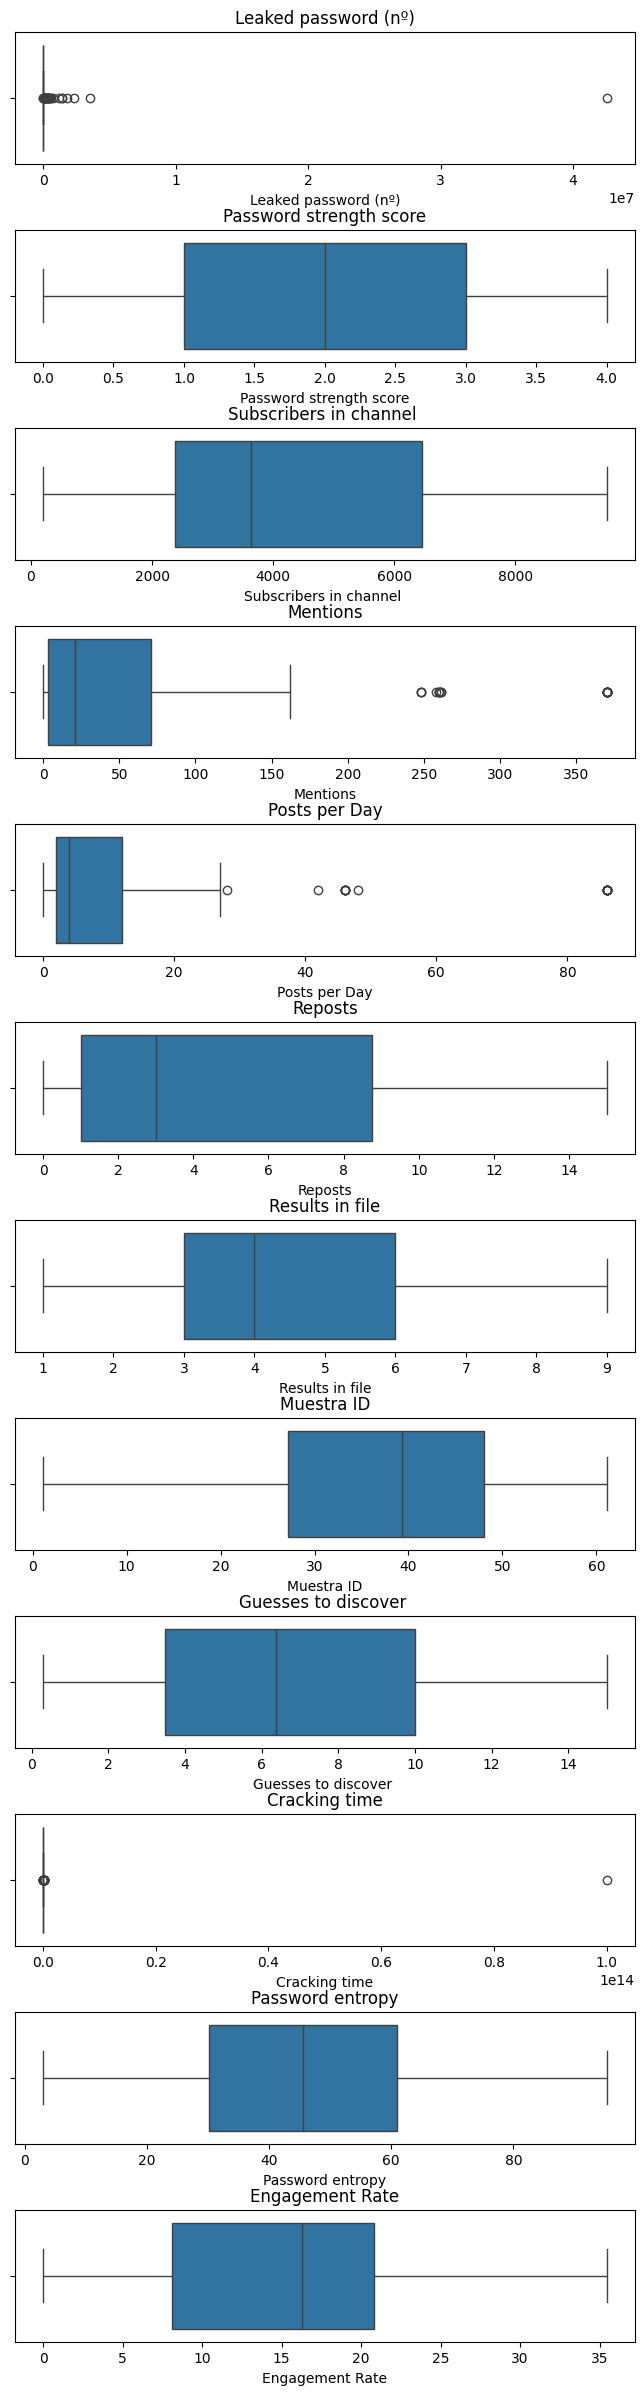

In [18]:
# Volvemos a hacer los boxplot con las modificaciones

fig, ax = plt.subplots(nrows=12, ncols=1, figsize=(8,30))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(cols_num):
    sns.boxplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col)

## ERRORES TIPOGRÁFICOS
Tenemos que corregir subniveles que python detecte como diferentes por estas escritos de forma distinta, pero que realmente son lo mismo (p. ej: ciber / Ciber)

No podemos trabajar con la lista de columnas:object porque incluye los metadatoos (password, hashes, etc...) que no nos interesan para este caso porque no contienen subíndices.

Crearemos entonces una nueva lista conlas variables categóricas que realmente representan características en el df

* Únicamente incluimos los metadatos de Channel name porque al ser grupos que se repiten continuamente en el dataframe nos interesa tener diagramas de su conteo

Se crea un diagrama de barras con la función sns.countplot :  Función de Seaborn para crear un gráfico de conteo, que muestra el número de ocurrencias de cada categoría en la columna especificada 

In [184]:
columnas_object = [col for col in df.columns if df[col].dtype == 'object']

cols_categories = ['VIP_credentials', 'VIP_group', 'User_status', 'Password_update', 'Password_type', 'Password_pattern', 'Chat_type', 'Channel_privacity', 'Channel_country', 'Country_file_name', 'RISK']

len(cols_categories)

11

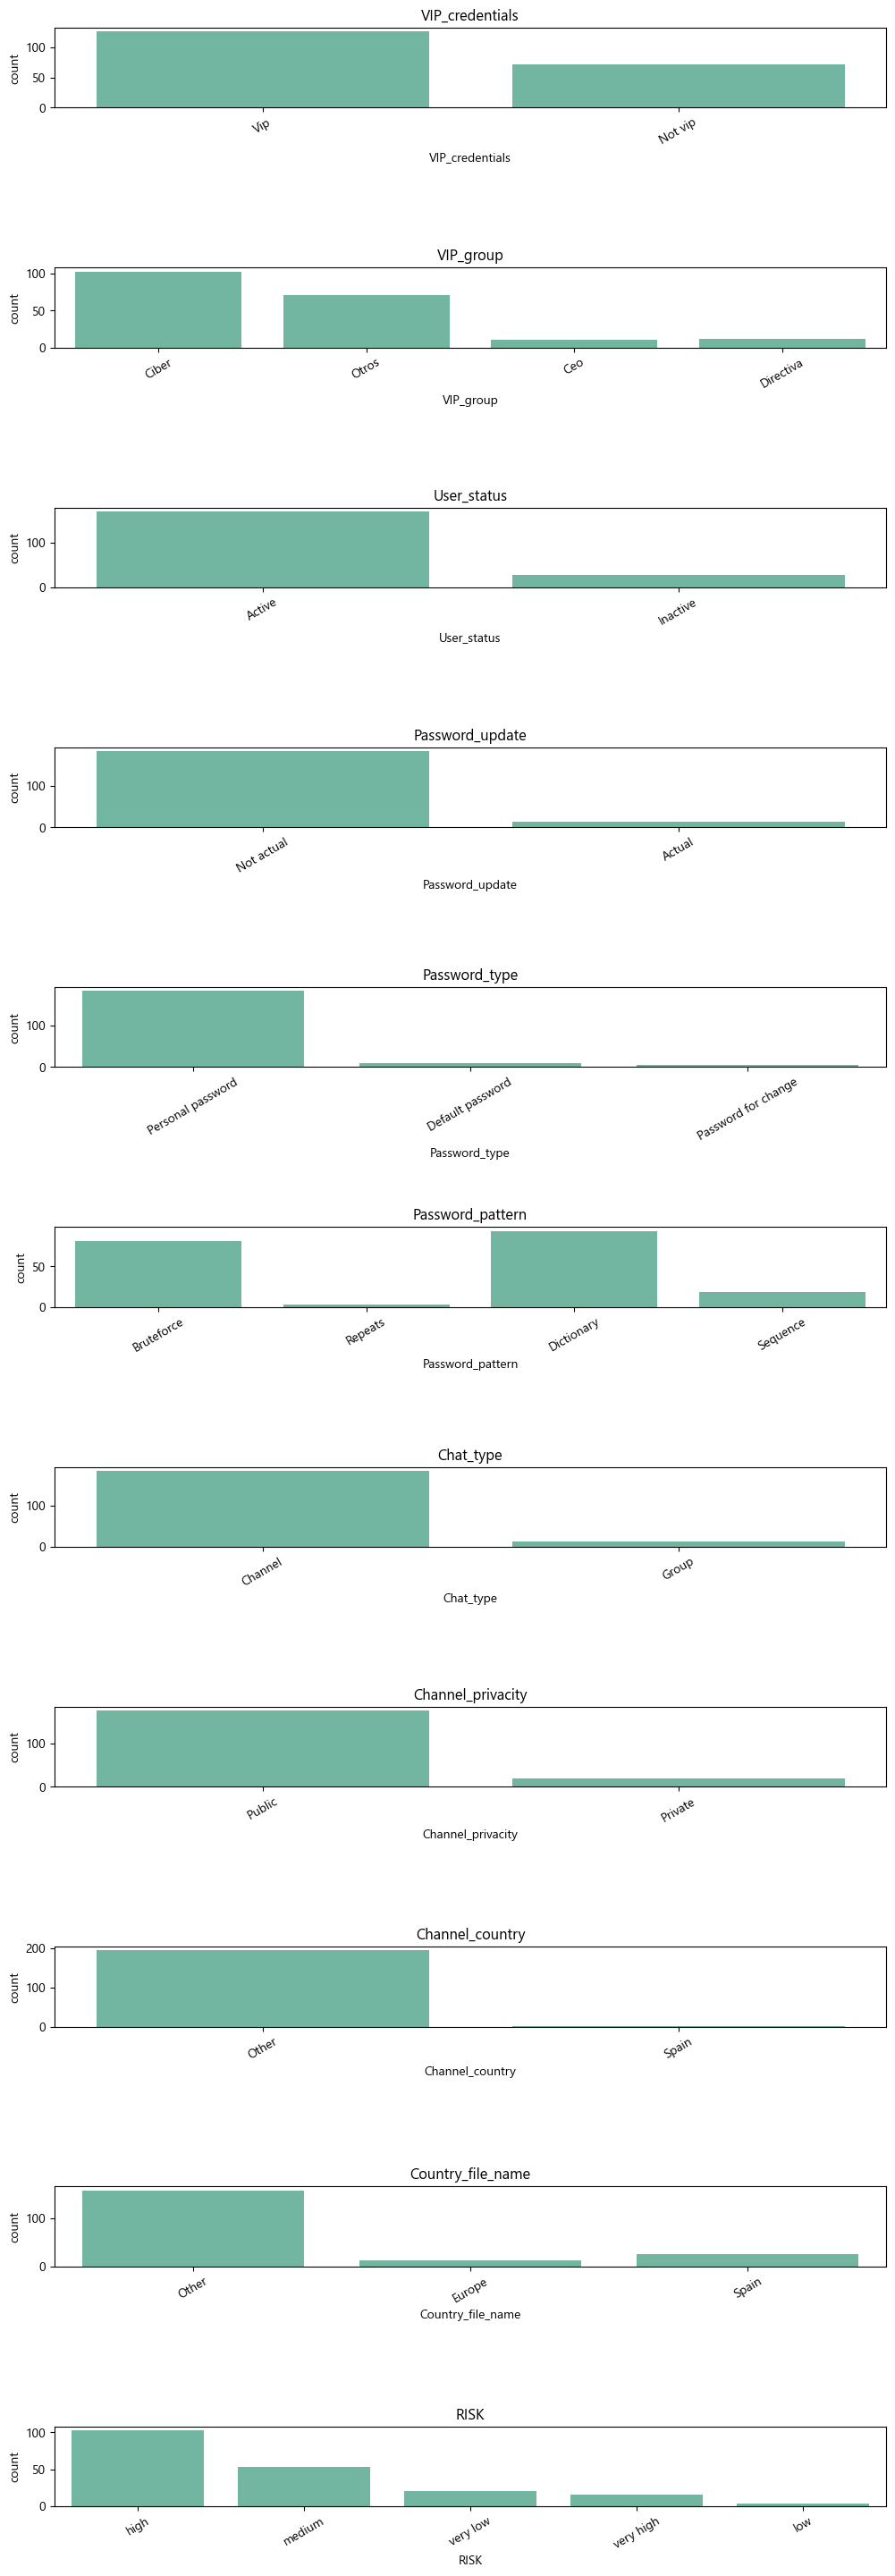

In [185]:
# Cambiar la fuente globalmente para soportar más caracteres

fig, ax = plt.subplots(nrows=11, ncols=1, figsize=(12,36))
fig.subplots_adjust(hspace=2)

for i, col in enumerate(cols_categories):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col) # Titulo de los subplots (nombre de cada columna)

    for tick in ax[i].get_xticklabels():
        tick.set_rotation(30) #Escribe las etiquetas del eje x (subniveles)

#### OBSERVACIONES
La única variable que hay que corregir es la de vip groups (ciber/Ciber, otros/Otros...)

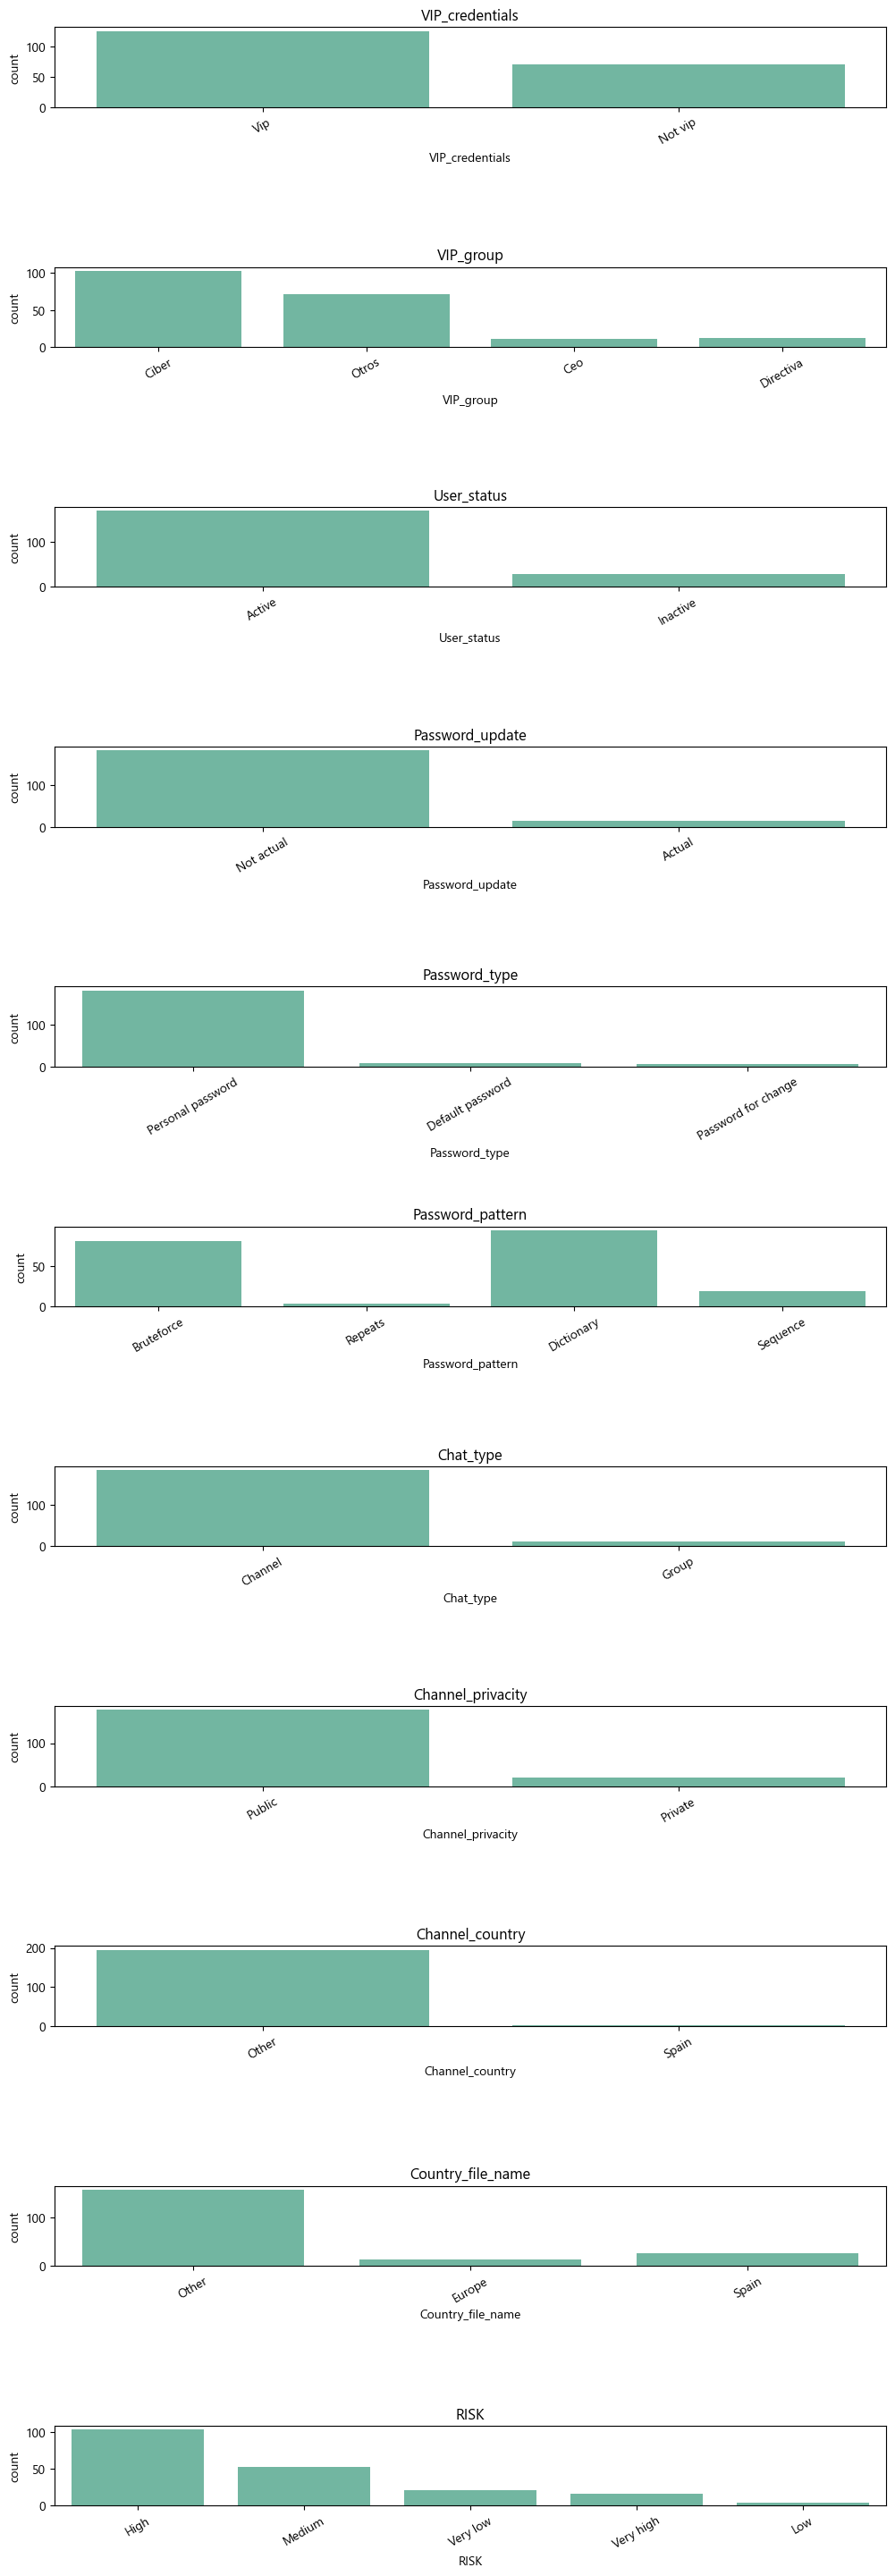

In [186]:
for column in df.columns:
    if column in cols_categories:
        df[column]=df[column].str.capitalize()


fig, ax = plt.subplots(nrows=11, ncols=1, figsize=(12,36))
fig.subplots_adjust(hspace=2)

for i, col in enumerate(cols_categories):
    sns.countplot(x=col, data=df, ax=ax[i])
    ax[i].set_title(col) # Titulo de los subplots (nombre de cada columna)

    for tick in ax[i].get_xticklabels():
        tick.set_rotation(30) #Escribe las etiquetas del eje x (subniveles)

In [189]:
# GUARDAR LAS MODIFICACIONES EN EL DATAFRAME

df.to_excel(ruta, index=False)
print("El DataFrame modificado ha sido guardado en el archivo Excel.")

El DataFrame modificado ha sido guardado en el archivo Excel.
